In [6]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
source = {}
for path in glob.glob(r"../../Data/t_taxi/*.csv"):
    source[len(pd.read_csv(path))] = path.split('\\')[-1].split('.')[0]

data = {}
for i, path in enumerate(glob.glob(r"*.csv")):
    df = pd.read_csv(path)
    if source[len(df)] in data.keys():
        print("Duplicate: ", data[source[len(df)]].equals(df))
    data[source[len(df)]] = df
data.keys()

dict_keys(['processed_dep_h0', 'processed_dep_h30', 'processed_dep_h120', 'processed_dep_h180'])

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

def model_eval(y, y_pred, name=None, file=None, verbose=True, **kwargs):
    report = {}
    if name:
        report['name'] = name
        if verbose:
            print(name)
    
    report["RMSE"] = mean_squared_error(y, y_pred, squared=False)
    report["MAE"] = mean_absolute_error(y, y_pred)
    report["% <2 min"] = sum(abs(y-y_pred) < 2*60)/len(y)*100
    report["% <5 min"] = sum(abs(y-y_pred) < 5*60)/len(y)*100
    report["% <7 min"] = sum(abs(y-y_pred) < 7*60)/len(y)*100
    report["time"] = str(pd.Timestamp(round(time.time()), unit='s'))
    
    for kwarg in kwargs:
        report[kwarg] = kwargs[kwarg]
    
    if file is not None:
        with open(file, "a") as f:
            f.write(str(report)+"\n")
    if verbose:
        print(report)
    return(report)

The following code uses processed data returned by Google AutoML with predicted_t_taxi

google_auto_ml_h30
{'name': 'google_auto_ml_h30', 'RMSE': 144.29598244767908, 'MAE': 101.8640053489542, '% <2 min': 69.60015874590734, '% <5 min': 96.30518900684592, '% <7 min': 98.75582895128485, 'time': '2021-04-14 21:21:47', 'dataset_train': 'processed_dep_h30', 'dataset_test': 'processed_dep_h0', 'model_type': 'AutoML', 'eval_type': 'SIMPLE_TEST'}
google_auto_ml_h30
{'name': 'google_auto_ml_h30', 'RMSE': 152.88532564536933, 'MAE': 107.62434124168415, '% <2 min': 67.90977981979832, '% <5 min': 95.27815899914474, '% <7 min': 98.28748732024583, 'time': '2021-04-14 21:21:47', 'dataset_train': 'processed_dep_h30', 'dataset_test': 'processed_dep_h30', 'model_type': 'AutoML', 'eval_type': 'SIMPLE_TEST'}
google_auto_ml_h30
{'name': 'google_auto_ml_h30', 'RMSE': 209.13292295551403, 'MAE': 148.14607634052322, '% <2 min': 55.43963627506698, '% <5 min': 87.44215312170172, '% <7 min': 94.40813509783227, 'time': '2021-04-14 21:21:47', 'dataset_train': 'processed_dep_h30', 'dataset_test': 'proces

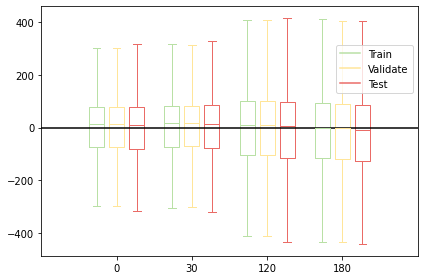

In [13]:
labels = ["Train", "Validate", "Test"]
data_train = []
data_val = []
data_test = []
ticks = [0, 30, 120, 180]
for h in ticks:
    df = data['processed_dep_h{}'.format(h)]
    data_train.append((df[df["dtype"]=="TRAIN"]['predicted_t_taxi'] - df[df["dtype"]=="TRAIN"]['t_taxi']).to_numpy(np.float64))
    data_val.append((df[df["dtype"]=="VALIDATE"]['predicted_t_taxi'] - df[df["dtype"]=="VALIDATE"]['t_taxi']).to_numpy(np.float64))
    data_test.append((df[df["dtype"]=="TEST"]['predicted_t_taxi'] - df[df["dtype"]=="TEST"]['t_taxi']).to_numpy(np.float64))
#     model_eval(df[df["dtype"]=="TEST"]['predicted_t_taxi'],
#               df[df["dtype"]=="TEST"]['t_taxi'],
#               file="./../results/model_google_automl.results",
#               name="google_auto_ml_h30",
#             dataset_train="processed_dep_h30",
#             dataset_test="processed_dep_h{}".format(h),
#             model_type="AutoML",
#             eval_type="SIMPLE_TEST",
#     )

colors = ["#B9E0A5", "#FFE599", "#EA6B66"]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_train, positions=np.array(range(len(data_train)))*3.0-0.8, sym='', widths=0.6)
bpm = plt.boxplot(data_val, positions=np.array(range(len(data_val)))*3.0, sym='', widths=0.6)
bpr = plt.boxplot(data_test, positions=np.array(range(len(data_test)))*3.0+0.8, sym='', widths=0.6)
set_box_color(bpl, colors[0]) # colors are from http://colorbrewer2.org/
set_box_color(bpm, colors[1]) # colors are from http://colorbrewer2.org/
set_box_color(bpr, colors[2])

plt.plot([], c=colors[0], label=labels[0])
plt.plot([], c=colors[1], label=labels[1])
plt.plot([], c=colors[2], label=labels[2])
plt.legend(loc="center right", bbox_to_anchor=(1, .75))

plt.plot([-3, 100], [0,0], color='black')

plt.xticks(range(0, len(ticks) * 3, 3), ticks)
plt.xlim(-3, len(ticks)*3)
# plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare.png')

In [ ]:
labels = ["Train", "Test"]
data_train = []
data_val = []
data_test = []
ticks = [0, 30, 120, 180]
for h in ticks:
    df = data['processed_dep_h{}'.format(h)]
    data_train.append((df[df["dtype"]=="TRAIN"]['predicted_t_taxi'] - df[df["dtype"]=="TRAIN"]['t_taxi']).to_numpy(np.float64))
    data_val.append((df[df["dtype"]=="VALIDATE"]['predicted_t_taxi'] - df[df["dtype"]=="VALIDATE"]['t_taxi']).to_numpy(np.float64))
    data_test.append((df[df["dtype"]=="TEST"]['predicted_t_taxi'] - df[df["dtype"]=="TEST"]['t_taxi']).to_numpy(np.float64))
#     model_eval(df[df["dtype"]=="TEST"]['predicted_t_taxi'],
#               df[df["dtype"]=="TEST"]['t_taxi'],
#               file="./../results/model_google_automl.results",
#               name="google_auto_ml_h30",
#             dataset_train="processed_dep_h30",
#             dataset_test="processed_dep_h{}".format(h),
#             model_type="AutoML",
#             eval_type="SIMPLE_TEST",
#     )

colors = ["#B9E0A5", "#FFE599", "#EA6B66"]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_train, positions=np.array(range(len(data_train)))*3.0-0.8, sym='', widths=0.6)
bpm = plt.boxplot(data_val, positions=np.array(range(len(data_val)))*3.0, sym='', widths=0.6)
bpr = plt.boxplot(data_test, positions=np.array(range(len(data_test)))*3.0+0.8, sym='', widths=0.6)
set_box_color(bpl, colors[0]) # colors are from http://colorbrewer2.org/
set_box_color(bpm, colors[1]) # colors are from http://colorbrewer2.org/
set_box_color(bpr, colors[2])

plt.plot([], c=colors[0], label=labels[0])
plt.plot([], c=colors[1], label=labels[1])
plt.plot([], c=colors[2], label=labels[2])
plt.legend(loc="center right", bbox_to_anchor=(1, .75))

plt.plot([-3, 100], [0,0], color='black')

plt.xticks(range(0, len(ticks) * 3, 3), ticks)
plt.xlim(-3, len(ticks)*3)
# plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare.png')